In [ ]:
⁷import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style
from plotnine import *
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_excel("/content/football_marketvalue_pred.xlsx")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,0,Kylian Mbappé,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,1,Raheem Sterling,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,2,Neymar,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,3,Sadio Mané,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,4,Mohamed Salah,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      517 non-null    int64  
 1   Unnamed: 0        517 non-null    int64  
 2   Player            517 non-null    object 
 3   Market value      517 non-null    object 
 4   Nation            370 non-null    object 
 5   Pos               370 non-null    object 
 6   Club_x            370 non-null    object 
 7   Leauge            370 non-null    object 
 8   Age               363 non-null    float64
 9   MP                356 non-null    float64
 10  Starts            356 non-null    float64
 11  Min               356 non-null    float64
 12  Gls               356 non-null    float64
 13  Ast               356 non-null    float64
 14  PK_x              356 non-null    float64
 15  PKatt_x           356 non-null    float64
 16  CrdY              356 non-null    float64
 1

In [ ]:
df.shape

(517, 52)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Player', 'Market value', 'Nation', 'Pos',
       'Club_x', 'Leauge', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK_x',
       'PKatt_x', 'CrdY', 'CrdR', 'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK',
       'PKatt', 'Sh', 'SoT', 'FK', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Tackle', 'TackleW', 'TakleD', 'Tkl%', 'Press', 'Succ_x', '%', 'Blocks',
       'ShotB', 'PassB', 'Int', 'Clr', 'Passes Completed', 'Passes Attempted',
       'Cmp%', 'Touches', 'Succ_y', 'Att', 'Succ%', '#Pl'],
      dtype='object')

In [ ]:
def parseValue(x):
    x = str(x).replace('€', '')
    if('m' in str(x)):
        x = str(x).replace('m', '')
        x = float(x) * 1000000
    elif('k' in str(x)):
        x = str(x).replace('k', '')
        x = float(x) * 1000
    return float(x)

df['Market value'] = df['Market value'].apply(parseValue)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,0,Kylian Mbappé,180000000.0,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,1,Raheem Sterling,128000000.0,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,2,Neymar,128000000.0,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,3,Sadio Mané,120000000.0,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,4,Mohamed Salah,120000000.0,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Market value,Age,MP,Starts,Min,Gls,Ast,PK_x,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
count,517.000000,517.000000,5.170000e+02,363.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,...,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,357.000000
mean,258.000000,258.988395,3.305706e+07,24.046832,48.280899,40.721910,3610.696629,8.977528,5.603933,0.879213,...,38.219101,74.429775,1657.188202,2015.963483,80.482444,2496.539326,55.306180,90.101124,63.976011,59.691877
std,149.389312,150.256886,2.015584e+07,3.266354,14.660468,16.376681,1418.034402,10.099759,5.311469,2.110875,...,30.059702,95.077452,1001.256684,1133.904831,6.875873,1244.185318,44.682972,74.565414,11.254210,48.176819
min,0.000000,0.000000,1.600000e+07,15.000000,6.000000,1.000000,143.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,44.000000,66.000000,61.420000,87.000000,1.000000,2.000000,33.330000,1.000000
25%,129.000000,129.000000,2.000000e+07,22.000000,38.750000,28.000000,2518.750000,2.000000,2.000000,0.000000,...,14.000000,15.000000,913.500000,1188.500000,75.165000,1580.000000,24.000000,36.000000,56.807500,25.000000
50%,258.000000,258.000000,2.700000e+07,24.000000,52.000000,42.000000,3783.000000,5.000000,4.000000,0.000000,...,30.000000,38.000000,1466.500000,1794.000000,80.960000,2305.500000,43.500000,67.000000,63.360000,46.000000
75%,387.000000,389.000000,4.000000e+07,26.000000,60.000000,55.000000,4803.000000,13.000000,8.000000,1.000000,...,57.000000,88.000000,2335.250000,2773.000000,86.115000,3359.250000,81.250000,131.000000,70.500000,87.000000
max,516.000000,518.000000,1.800000e+08,34.000000,71.000000,69.000000,6174.000000,58.000000,30.000000,15.000000,...,154.000000,550.000000,5145.000000,5872.000000,94.650000,6480.000000,300.000000,485.000000,100.000000,315.000000


In [ ]:
df.nunique()

Unnamed: 0.1        517
Unnamed: 0          517
Player              499
Market value         55
Nation               45
Pos                   7
Club_x               69
Leauge                5
Age                  19
MP                   61
Starts               65
Min                 340
Gls                  42
Ast                  24
PK_x                 14
PKatt_x              15
CrdY                 23
CrdR                  4
Gls90                75
Ast90                45
G+A                 111
Gls+Ast              54
PK                    9
PKatt                10
Sh                  149
SoT                  77
FK                   15
SoT%                252
Sh/90               213
SoT/90              141
G/Sh                 32
G/SoT                64
Tackle              134
TackleW             100
TakleD               65
Tkl%                182
Press               308
Succ_x              220
%                   305
Blocks              115
ShotB                49
PassB           

In [ ]:
df["Market value"].unique()

array([1.80e+08, 1.28e+08, 1.20e+08, 1.17e+08, 1.12e+08, 9.90e+07,
       9.60e+07, 8.10e+07, 8.00e+07, 7.50e+07, 7.20e+07, 6.80e+07,
       6.75e+07, 6.50e+07, 6.40e+07, 6.00e+07, 5.60e+07, 5.40e+07,
       5.20e+07, 5.00e+07, 4.95e+07, 4.80e+07, 4.50e+07, 4.40e+07,
       4.05e+07, 4.00e+07, 3.75e+07, 3.60e+07, 3.50e+07, 3.35e+07,
       3.30e+07, 3.20e+07, 3.15e+07, 3.05e+07, 3.00e+07, 2.95e+07,
       2.90e+07, 2.80e+07, 2.70e+07, 2.55e+07, 2.50e+07, 2.45e+07,
       2.40e+07, 2.30e+07, 2.25e+07, 2.20e+07, 2.15e+07, 2.10e+07,
       2.00e+07, 1.90e+07, 1.85e+07, 1.80e+07, 1.75e+07, 1.70e+07,
       1.60e+07])

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Player                0
Market value          0
Nation              147
Pos                 147
Club_x              147
Leauge              147
Age                 154
MP                  161
Starts              161
Min                 161
Gls                 161
Ast                 161
PK_x                161
PKatt_x             161
CrdY                161
CrdR                161
Gls90               161
Ast90               161
G+A                 161
Gls+Ast             161
PK                  154
PKatt               154
Sh                  161
SoT                 161
FK                  154
SoT%                161
Sh/90               161
SoT/90              161
G/Sh                161
G/SoT               161
Tackle              161
TackleW             161
TakleD              160
Tkl%                154
Press               161
Succ_x              161
%                   161
Blocks              161
ShotB               161
PassB           

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Player              0
Market value        0
Nation              0
Pos                 0
Club_x              0
Leauge              0
Age                 0
MP                  0
Starts              0
Min                 0
Gls                 0
Ast                 0
PK_x                0
PKatt_x             0
CrdY                0
CrdR                0
Gls90               0
Ast90               0
G+A                 0
Gls+Ast             0
PK                  0
PKatt               0
Sh                  0
SoT                 0
FK                  0
SoT%                0
Sh/90               0
SoT/90              0
G/Sh                0
G/SoT               0
Tackle              0
TackleW             0
TakleD              0
Tkl%                0
Press               0
Succ_x              0
%                   0
Blocks              0
ShotB               0
PassB               0
Int                 0
Clr                 0
Passes Completed    0
Passes Att

In [ ]:
df1.shape

(356, 52)

In [ ]:
df1.duplicated("Player")

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 356, dtype: bool

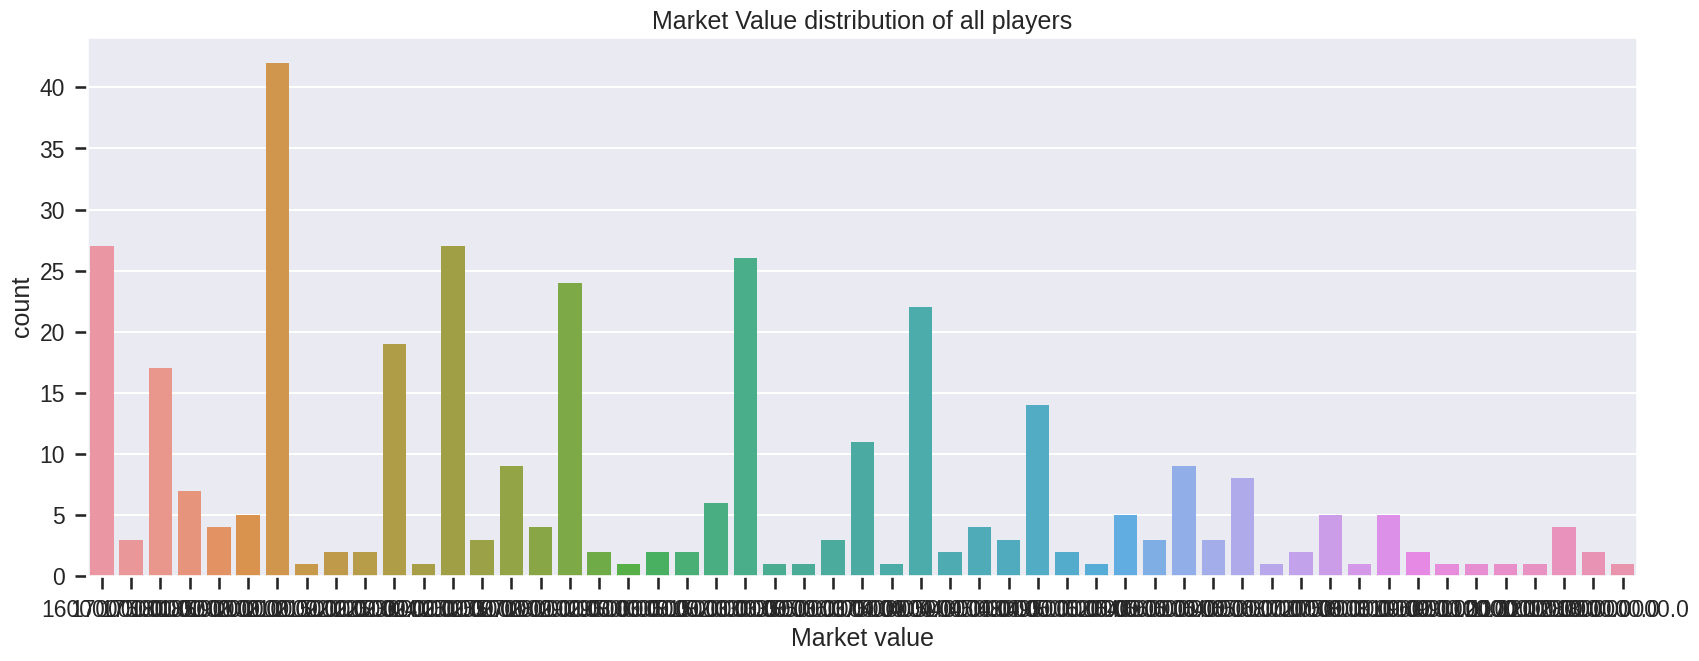

In [ ]:
plt.figure(1, figsize=(20, 7))
sb.countplot( x= 'Market value', data= df1)
plt.title('Market Value distribution of all players')
plt.show()

<ipython-input-292-79204cf72c74>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

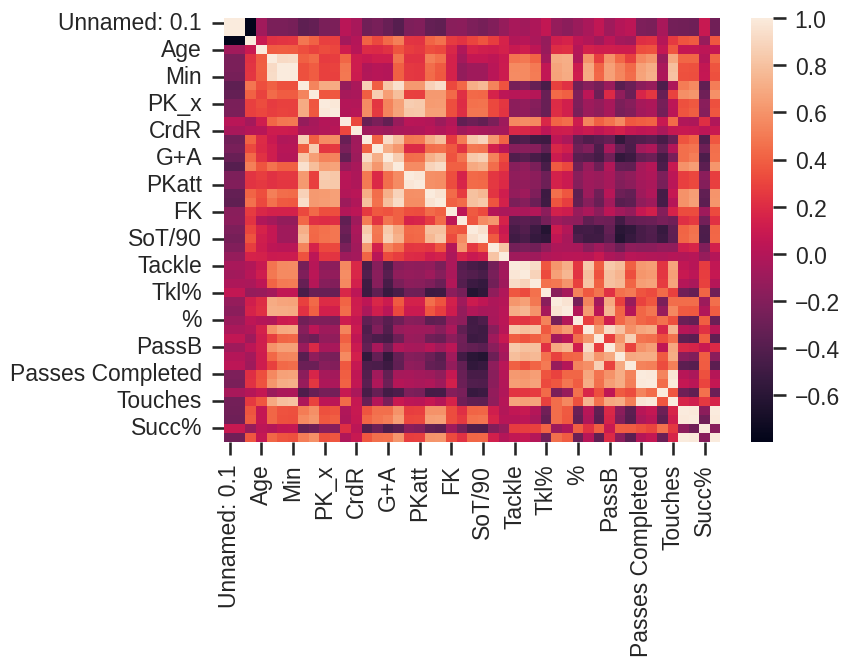

In [ ]:
corr_matrix = df1.corr()
sb.heatmap(corr_matrix)

In [ ]:
corr_matrix["Market value"].sort_values(ascending=False)

Market value        1.000000
Gls+Ast             0.516337
Gls                 0.486157
SoT                 0.466133
G+A                 0.438256
Sh                  0.414871
Ast                 0.410334
Gls90               0.405890
Att                 0.380267
#Pl                 0.365533
Succ_y              0.358069
SoT/90              0.356291
Ast90               0.316262
Sh/90               0.301276
PK_x                0.282251
PKatt_x             0.280334
G/Sh                0.272932
FK                  0.269123
Touches             0.256682
Min                 0.247530
PK                  0.240508
Starts              0.236290
PKatt               0.233352
SoT%                0.230916
Passes Attempted    0.228116
MP                  0.224038
Passes Completed    0.208901
G/SoT               0.157972
Succ_x              0.153119
Press               0.124796
Age                 0.094554
%                   0.040517
PassB               0.032403
TackleW             0.012920
Cmp%          

In [ ]:
features = ['Market value','Gls+Ast','Gls','SoT','G+A','Sh','Ast','Gls90','Att','#Pl','Succ_y','Ast90']
df2 = df1[[*features]]
df2.head()

,Market value,Gls+Ast,Gls,SoT,G+A,Sh,Ast,Gls90,Att,#Pl,Succ_y,Ast90
0,180000000.0,63.0,51.0,114.0,1.47,209.0,12.0,1.19,247.0,152.0,132.0,0.28
1,128000000.0,39.0,29.0,62.0,0.71,153.0,10.0,0.53,258.0,151.0,139.0,0.18
2,128000000.0,41.0,28.0,52.0,1.33,115.0,13.0,0.91,292.0,184.0,164.0,0.42
3,120000000.0,45.0,37.0,72.0,0.77,150.0,8.0,0.63,212.0,142.0,128.0,0.14
4,120000000.0,54.0,39.0,103.0,0.87,240.0,15.0,0.63,229.0,148.0,137.0,0.24


In [ ]:
df2.shape

(356, 12)

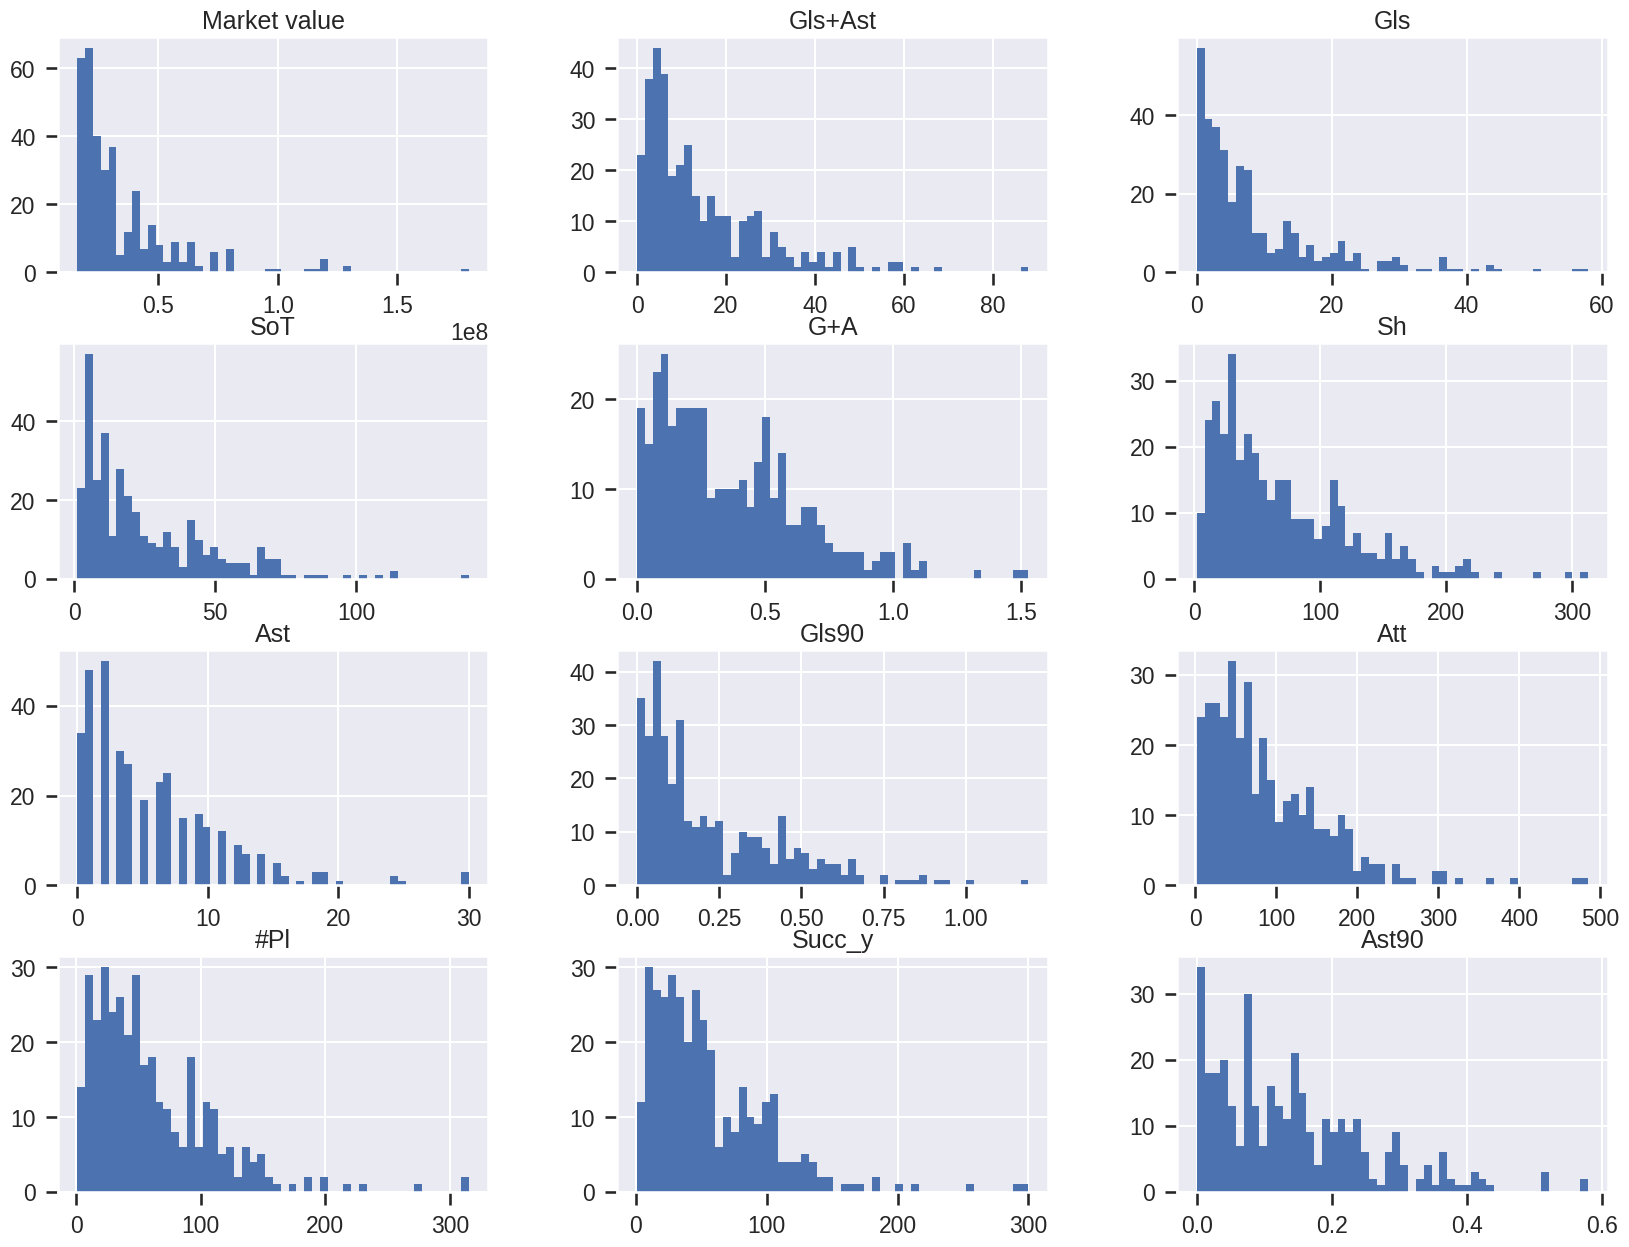

In [ ]:
df2.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

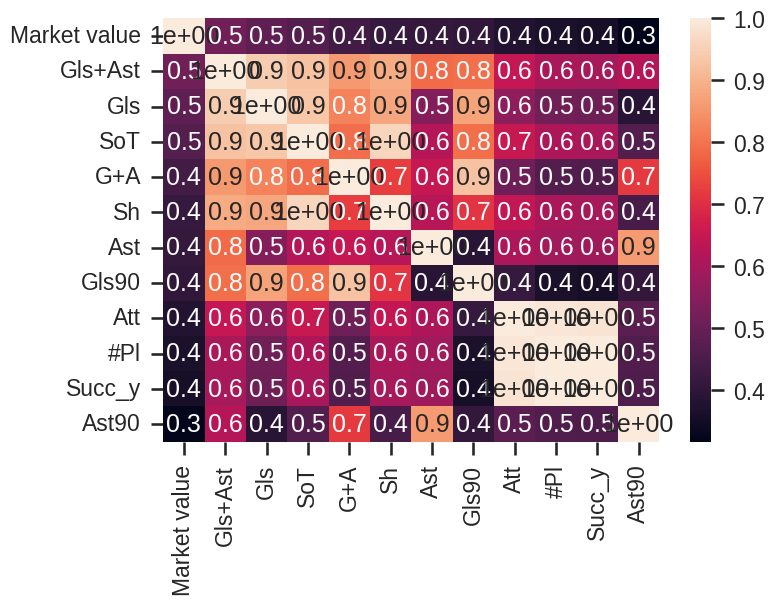

In [ ]:
corr_matrix = df2.corr()
sb.heatmap(corr_matrix , annot =  True , fmt = ".1")

<Axes: xlabel='Market value'>

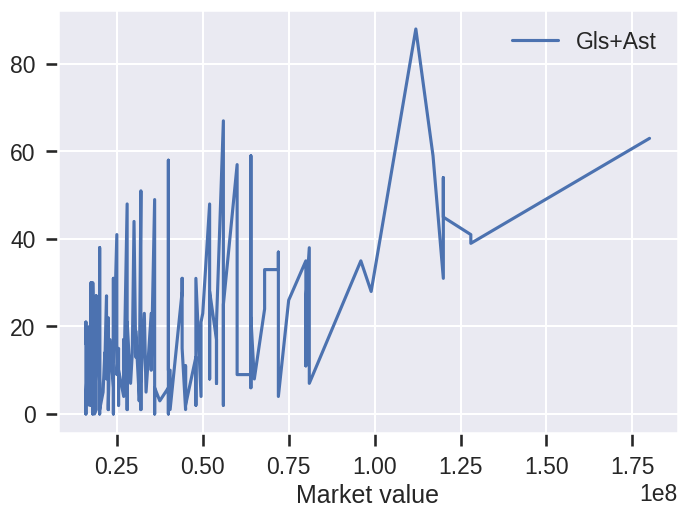

In [ ]:
df2.plot(x="Market value",y="Gls+Ast")

In [ ]:
train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

In [ ]:
print('Train',' ','Test')
print(len(train_set),'+',len(test_set),'=',len(train_set)+len(test_set))

Train   Test
284 + 72 = 356


In [ ]:
df_features = train_set.drop("Market value", axis=1) 
df_labels = train_set["Market value"].copy()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(df_features, df_labels)

LinearRegression()

In [ ]:
df_predictions = lin_reg.predict(df_features)

In [ ]:
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17575186.15444877

In [ ]:
score = r2_score(df_labels, df_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 35.73 %


In [ ]:
train_set1, test_set1 = train_test_split(df2, test_size=0.4, random_state=42)
df_features1 = train_set1.drop("Market value", axis=1) 
df_labels1 = train_set1["Market value"].copy()
tree_reg = DecisionTreeRegressor(random_state=101)
tree_reg.fit(df_features1, df_labels1)

DecisionTreeRegressor(random_state=101)

In [ ]:
df_predictions = tree_reg.predict(df_features1)
tree_mse = mean_squared_error(df_labels1, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

290700.9498669056

In [ ]:
score = r2_score(df_labels1, df_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.98 %


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_features, df_labels)

RandomForestRegressor(random_state=42)

In [ ]:
df_predictions = forest_reg.predict(df_features)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

6403828.632814178

In [ ]:
score = r2_score(df_labels, df_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 91.47 %


In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_features, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(df_features)


In [ ]:
final_mse = mean_squared_error(df_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

6845711.693003479

In [ ]:
final_model_score = r2_score(df_labels, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')

Accuracy: 90.25 %
